# 1) Data Preparation

# 1.1)  Preprocess Data
## In English, All newline characters are replaced by a space. We use regular expression to preprocess the data i.e. anything that is not in the domain [A-Za-z0-9 ''".!,] is removed. Along with english alphabets and numbers, special characters like . , ! " ' are only allowed.

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
import re

with open('../data/alice_in_wonderland.txt', 'r') as f:
    f = f.read().replace('\n', ' ')
    f = re.sub('[^A-Za-z0-9 ''".!,]+', '', f)
    sent = sent_tokenize(f)

In [ ]:
## Checking the word level tokens
with open('../data/alice_in_wonderland.txt', 'r') as f:
    f = f.read()
    f = re.sub('[^A-Za-z0-9 ''".!,]+', '', f)
    words = word_tokenize(f)
    print(len(words), len(set(words)))
    print(words[100:110])

In [ ]:
## Using train_test_split to split the data into train and test sets (sentence wise).

from sklearn.model_selection import train_test_split
eng_train, eng_test = train_test_split(sent, train_size=0.8, random_state=0)
print(len(eng_test), len(eng_train))

with open("eng_train.txt", "w") as f:
    for sentence in eng_train:
        f.write(sentence + "\n")

with open("eng_test.txt", "w") as f:
    for sentence in eng_test:
        f.write(sentence + "\n")


# 2) Subword Segmentation 
## Here, for the purpose of sub word segmentation, we have trained 3 models for each language which have their corresponding output files listed with the respective sub-words generated. 
## Character Level Model (S1): Used Vocab size as 62 with character coverage of 1.0 to split the data into characters. We could observe that english character vocab is much smaller than bengali.
## Subword Small Unit Model (S2): Vocab Size of 500 worked best. Used the same character coverage of 0.995 for all the models of bengali. In S2 Model Vocab, we could observe that words are broken down into smaller units which are close to characters like ed, en, _of, _be etc.
## Subword Large Uni Model (S3): Vocab size of 2000 gave us better results. We used larger vocab sizes in bengali compared to english due to bengali's rich morphological language properties. In S3 Model Vocab, we could observe words broken down into larger units which are close to words like _little, ning, ried, ily, _under etc.

In [133]:
#Sentence Piece S1 Model
!spm_train --input=eng_train.txt --model_prefix=eng_s1/eng_model_s1 --vocab_size=62 --character_coverage=1.0 --model_type=bpe
!spm_encode --model=eng_s1/eng_model_s1.model --output_format=piece --input=eng_train.txt --output=eng_s1/eng_s1.txt
!spm_encode --model=eng_s1/eng_model_s1.model --output_format=piece --input=eng_test.txt --output=eng_s1/eng_test_s1.txt

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: eng_train.txt
  input_format: 
  model_prefix: eng_s1/eng_model_s1
  model_type: BPE
  vocab_size: 62
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape_

In [134]:
#Sentence Piece S2 Model
!spm_train --input=eng_train.txt --model_prefix=eng_s2/eng_model_s2 --vocab_size=400 --character_coverage=1.0 --model_type=bpe
!spm_encode --model=eng_s2/eng_model_s2.model --output_format=piece --input=eng_train.txt --output=eng_s2/eng_s2.txt
!spm_encode --model=eng_s2/eng_model_s2.model --output_format=piece --input=eng_test.txt --output=eng_s2/eng_test_s2.txt

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: eng_train.txt
  input_format: 
  model_prefix: eng_s2/eng_model_s2
  model_type: BPE
  vocab_size: 400
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escape

In [135]:
#Sentence Piece S3 Model
!spm_train --input=eng_train.txt --model_prefix=eng_s3/eng_model_s3 --vocab_size=2000 --character_coverage=1.0 --model_type=bpe
!spm_encode --model=eng_s3/eng_model_s3.model --output_format=piece --input=eng_train.txt --output=eng_s3/eng_s3.txt
!spm_encode --model=eng_s3/eng_model_s3.model --output_format=piece --input=eng_test.txt --output=eng_s3/eng_test_s3.txt

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: eng_train.txt
  input_format: 
  model_prefix: eng_s3/eng_model_s3
  model_type: BPE
  vocab_size: 2000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  escap

# 3) LM Training
# English Baseline RNNLM Model S1
## Using Default Parameters: Hidden:&ensp; 40  &emsp; BPTT:&ensp; 3 &emsp;  Class:&ensp;  60
## Results:
## TRAIN entropy: 2.31    
## VALID entropy: 2.39
## PPL net: 5.27

In [136]:
## Baseline Model S1
!/home/snlp-project-21/rnnlm/rnnlm -train eng_s1/eng_s1.txt -valid eng_s1/eng_test_s1.txt  -rnnlm eng_s1/rnnlm_baseline_s1 -hidden 40 -rand-seed 1 -debug 2 -bptt 3 -class 60
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm eng_s1/rnnlm_baseline_s1 -test eng_s1/eng_test_s1.txt

debug mode: 2
train file: eng_s1/eng_s1.txt
valid file: eng_s1/eng_test_s1.txt
class size: 60
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: eng_s1/rnnlm_baseline_s1
Starting training using file eng_s1/eng_s1.txt
Vocab size: 60
Words in train file: 110378
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 3.1304    Words/sec: 168461.0   VALID entropy: 2.7969
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 2.6996    Words/sec: 170833.1   VALID entropy: 2.6445
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 2.5906    Words/sec: 172203.8   VALID entropy: 2.5954
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 2.5405    Words/sec: 172825.0   VALID entropy: 2.5728
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 2.5106    Words/sec: 174422.1   VALID entropy: 2.5661
Iter:   5	Alpha: 0.050000	   TRAIN entropy: 2.4146    Words/sec: 174008.5   VALID entropy: 2.4825
Iter:   6	Alpha: 0.025000	   TRAIN entropy: 2.3627    Words/sec: 172492.8   VALID entropy: 2.4377
Iter:   7	Alpha: 0.012500	   TRAIN entropy: 2.3352

# English Baseline RNNLM Model S2
## Using Default Parameters: Hidden:&ensp; 40  &emsp; BPTT:&ensp; 3 &emsp;  Class:&ensp;  395
## Results:
## TRAIN entropy: 4.47    
## VALID entropy: 5.10
## PPL net: 34.36

In [137]:
## Baseline Model S2
!/home/snlp-project-21/rnnlm/rnnlm -train eng_s2/eng_s2.txt -valid eng_s2/eng_test_s2.txt  -rnnlm eng_s2/rnnlm_baseline_s2 -hidden 40 -rand-seed 1 -debug 2 -bptt 3 -class 395
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm eng_s2/rnnlm_baseline_s2 -test eng_s2/eng_test_s2.txt

debug mode: 2
train file: eng_s2/eng_s2.txt
valid file: eng_s2/eng_test_s2.txt
class size: 395
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: eng_s2/rnnlm_baseline_s2
Starting training using file eng_s2/eng_s2.txt
Vocab size: 395
Words in train file: 44333
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 7.4815    Words/sec: 45877.0   VALID entropy: 7.0806
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 6.7115    Words/sec: 45716.8   VALID entropy: 6.4546
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 6.1141    Words/sec: 46213.6   VALID entropy: 5.9985
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 5.7044    Words/sec: 46200.4   VALID entropy: 5.7162
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 5.4337    Words/sec: 46440.6   VALID entropy: 5.5391
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 5.2482    Words/sec: 45627.2   VALID entropy: 5.4364
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 5.1142    Words/sec: 46144.3   VALID entropy: 5.3777
Iter:   7	Alpha: 0.100000	   TRAIN entropy: 5.0132    Wo

# English Baseline RNNLM Model S3
## Using Default Parameters: Hidden:&ensp; 40  &emsp; BPTT:&ensp; 3 &emsp;  Class:&ensp;  395
## Results:
## TRAIN entropy: 6.13    
## VALID entropy: 7.24
## PPL net: 152.00

In [138]:
## Baseline Model S3
!/home/snlp-project-21/rnnlm/rnnlm -train eng_s3/eng_s3.txt -valid eng_s3/eng_test_s3.txt  -rnnlm eng_s3/rnnlm_baseline_s3 -hidden 40 -rand-seed 3 -debug 2 -bptt 2 -class 1815
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm eng_s3/rnnlm_baseline_s3 -test eng_s3/eng_test_s3.txt


debug mode: 2
train file: eng_s3/eng_s3.txt
valid file: eng_s3/eng_test_s3.txt
class size: 1815
Hidden layer size: 40
BPTT: 2
Rand seed: 3
rnnlm file: eng_s3/rnnlm_baseline_s3
Starting training using file eng_s3/eng_s3.txt
Vocab size: 1815
Words in train file: 29176
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 8.4702    Words/sec: 10365.6   VALID entropy: 8.2447
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 7.9597    Words/sec: 10479.8   VALID entropy: 7.9331
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 7.6406    Words/sec: 10454.3   VALID entropy: 7.7374
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 7.3944    Words/sec: 10350.0   VALID entropy: 7.6084
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 7.1952    Words/sec: 10373.7   VALID entropy: 7.5250
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 7.0252    Words/sec: 10414.9   VALID entropy: 7.4712
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 6.8733    Words/sec: 10300.4   VALID entropy: 7.4362
Iter:   7	Alpha: 0.100000	   TRAIN entropy: 6.7340    

# English Final RNNLM Model S1
## Finetuned Parameters: Hidden  160  &emsp; BPTT  7 &emsp;  Class  60
## Results:
## TRAIN entropy: 1.82    
## VALID entropy: 2.06
## PPL net: 4.19

## Compared to Baseline S1 Model we could improve the perplexity by 1.2 units

In [139]:
#Final Model S1
!/home/snlp-project-21/rnnlm/rnnlm -train eng_s1/eng_s1.txt -valid eng_s1/eng_test_s1.txt  -rnnlm eng_s1/rnnlm_final_s1 -hidden 160 -rand-seed 1 -debug 2 -bptt 7 -class 60
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm eng_s1/rnnlm_final_s1 -test eng_s1/eng_test_s1.txt


debug mode: 2
train file: eng_s1/eng_s1.txt
valid file: eng_s1/eng_test_s1.txt
class size: 60
Hidden layer size: 160
BPTT: 7
Rand seed: 1
rnnlm file: eng_s1/rnnlm_final_s1
Starting training using file eng_s1/eng_s1.txt
Vocab size: 60
Words in train file: 110378
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 3.1193    Words/sec: 19573.4   VALID entropy: 2.7474
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 2.5965    Words/sec: 19269.3   VALID entropy: 2.5428
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 2.4239    Words/sec: 19782.7   VALID entropy: 2.4486
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 2.3185    Words/sec: 19854.3   VALID entropy: 2.3907
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 2.2435    Words/sec: 19851.2   VALID entropy: 2.3460
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 2.1862    Words/sec: 19788.1   VALID entropy: 2.3284
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 2.1411    Words/sec: 19850.1   VALID entropy: 2.3225
Iter:   7	Alpha: 0.050000	   TRAIN entropy: 1.9999    Words

# English Final RNNLM Model S2
## Finetuned Parameters: Hidden  85  &emsp; BPTT  3 &emsp;  Class  395
## Results:
## TRAIN entropy: 4.09    
## VALID entropy: 5.04
## PPL net: 32.74

## Compared to Baseline S1 Model we could improve the perplexity by 1.6 units

In [140]:
#Final Model S2
!/home/snlp-project-21/rnnlm/rnnlm -train eng_s2/eng_s2.txt -valid eng_s2/eng_test_s2.txt  -rnnlm eng_s2/rnnlm_final_s2 -hidden 85 -rand-seed 1 -debug 2 -bptt 3 -class 395
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm eng_s2/rnnlm_final_s2 -test eng_s2/eng_test_s2.txt


debug mode: 2
train file: eng_s2/eng_s2.txt
valid file: eng_s2/eng_test_s2.txt
class size: 395
Hidden layer size: 85
BPTT: 3
Rand seed: 1
rnnlm file: eng_s2/rnnlm_final_s2
Starting training using file eng_s2/eng_s2.txt
Vocab size: 395
Words in train file: 44333
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 7.5013    Words/sec: 21445.0   VALID entropy: 7.1067
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 6.7071    Words/sec: 21371.3   VALID entropy: 6.4350
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 6.0748    Words/sec: 21421.3   VALID entropy: 5.9536
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 5.6371    Words/sec: 21706.1   VALID entropy: 5.6689
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 5.3404    Words/sec: 21574.4   VALID entropy: 5.5034
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 5.1266    Words/sec: 21581.0   VALID entropy: 5.3993
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 4.9593    Words/sec: 21312.0   VALID entropy: 5.3353
Iter:   7	Alpha: 0.100000	   TRAIN entropy: 4.8218    Words

# English Final RNNLM Model S3
## Finetuned Parameters: Hidden  60  &emsp; BPTT  5 &emsp;  Class  1815
## Results:
## TRAIN entropy: 6.11    
## VALID entropy: 7.27
## PPL net: 148.65

## Compared to Baseline S1 Model we could improve the perplexity by 4.65 units

In [1]:
#Final Model S3
!/home/snlp-project-21/rnnlm/rnnlm -train eng_s3/eng_s3.txt -valid eng_s3/eng_test_s3.txt  -rnnlm eng_s3/rnnlm_final_s3 -hidden 60 -rand-seed 1 -debug 2 -bptt 5 -class 1815
!/home/snlp-project-21/rnnlm/rnnlm -rnnlm eng_s3/rnnlm_final_s3 -test eng_s3/eng_test_s3.txt

debug mode: 2
train file: eng_s3/eng_s3.txt
valid file: eng_s3/eng_test_s3.txt
class size: 1815
Hidden layer size: 60
BPTT: 5
Rand seed: 1
rnnlm file: eng_s3/rnnlm_final_s3
Starting training using file eng_s3/eng_s3.txt
Vocab size: 1815
Words in train file: 29176
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 8.4751    Words/sec: 7019.3   VALID entropy: 8.2597
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 7.9803    Words/sec: 7450.0   VALID entropy: 7.9545
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 7.6588    Words/sec: 7288.1   VALID entropy: 7.7558
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 7.4098    Words/sec: 7356.0   VALID entropy: 7.6294
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 7.2079    Words/sec: 7326.3   VALID entropy: 7.5422
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 7.0335    Words/sec: 7376.0   VALID entropy: 7.4802
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 6.8751    Words/sec: 7277.3   VALID entropy: 7.4350
Iter:   7	Alpha: 0.100000	   TRAIN entropy: 6.7270    Words/sec:

# 4) Text Generation
## Observing the generated text files, we found that the sentences are more meaningful in S3 and S2 models compared to S1. This is due to the fact that S1 Model holds less information as it models only by characters compared to S2 and S3 Models which models closer to words. So, we found that S3 model's generated data is more rich and closer to the english laguage compared to S2 and S1.

In [1]:
for i in [1,2,3,4,5,6,7]:
    val = pow(10,i)
    fn = "eng_s1/text_gen_s1_10_"+str(i)+".txt"
    decoded_fn = "eng_s1/text_gen_s1_10_"+str(i)+"_decoded.txt"
    ## Generating the text using the correspoding RNNLM S1 model for different values of i
    !/home/snlp-project-21/rnnlm/rnnlm -rnnlm eng_s1/rnnlm_final_s1 -gen $val -debug 0 > $fn
    ## Decoding the Generating Text using the corresponding sentence piece S1 model
    !spm_decode --model=eng_s1/eng_model_s1.model --input_format=piece --input=$fn --output=$decoded_fn


for i in [1,2,3,4,5,6,7]:
    val = pow(10,i)
    fn = "eng_s2/text_gen_s2_10_"+str(i)+".txt"    
    decoded_fn = "eng_s2/text_gen_s2_10_"+str(i)+"_decoded.txt"
    ## Generating the text using the correspoding RNNLM S2 model for different values of i
    !/home/snlp-project-21/rnnlm/rnnlm -rnnlm eng_s2/rnnlm_final_s2 -gen $val -debug 0 > $fn
    ## Decoding the Generating Text using the corresponding sentence piece S2 model
    !spm_decode --model=eng_s2/eng_model_s2.model --input_format=piece --input=$fn --output=$decoded_fn

for i in [1,2,3,4,5,6,7]:
    val = pow(10,i)
    fn = "eng_s3/text_gen_s3_10_"+str(i)+".txt"
    decoded_fn = "eng_s3/text_gen_s3_10_"+str(i)+"_decoded.txt"
    ## Generating the text using the correspoding RNNLM S2 model for different values of i
    !/home/snlp-project-21/rnnlm/rnnlm -rnnlm eng_s3/rnnlm_final_s3 -gen $val -debug 0 > $fn
    ## Decoding the Generating Text using the corresponding sentence piece S3 model
    !spm_decode --model=eng_s3/eng_model_s3.model --input_format=piece --input=$fn --output=$decoded_fn


# 5) OOV Comparision
## 5.1) OOV Rate of Original Corpus: 0.061 

In [2]:
from nltk.tokenize import word_tokenize
def get_vocab(filename):
    with open(filename,'r') as f:
        tokens = word_tokenize(f.read())
        return (tokens)


train_tokens = get_vocab('eng_train.txt')
test_tokens = get_vocab('eng_test.txt')

print(len(train_tokens), len(test_tokens))
print(len(set(test_tokens).difference(set(train_tokens))) / len(test_tokens))

24010 6366
0.06157712849513038


# 5.2) OOV Rates for different augmented sizes for each of the models S1, S2 and S3

In [3]:
oov_s1, oov_s2, oov_s3 = [], [], []
for i in range(1,8):
    val = pow(10,i)
    decoded_fn = "eng_s1/text_gen_s1_10_"+str(i)+"_decoded.txt"
    tokens = get_vocab(decoded_fn)
    aug_tokens = set(train_tokens) | (set(tokens))
    oov_s1.append(len(set(test_tokens).difference(set(aug_tokens))) / len(test_tokens))
    print('Out of Voacabulary words:',len(set(test_tokens).difference(set(aug_tokens))))
    print('OOV Rate for S1 '+ str(val), len(set(test_tokens).difference(set(aug_tokens))) / len(test_tokens)  )

print('-----------------------')

for i in range(1,8):
    val = pow(10,i)
    decoded_fn = "eng_s2/text_gen_s2_10_"+str(i)+"_decoded.txt"
    tokens = get_vocab(decoded_fn)
    aug_tokens = set(train_tokens) | (set(tokens))
    oov_s2.append(len(set(test_tokens).difference(set(aug_tokens))) / len(test_tokens))
    print('Out of Voacabulary words:',len(set(test_tokens).difference(set(aug_tokens))))
    print('OOV Rate for S2 '+ str(val), len(set(test_tokens).difference(set(aug_tokens))) / len(test_tokens)  )

print('-----------------------')

for i in range(1,8):
    val = pow(10,i)
    decoded_fn = "eng_s3/text_gen_s3_10_"+str(i)+"_decoded.txt"
    tokens = get_vocab(decoded_fn)
    aug_tokens = set(train_tokens) | (set(tokens))
    oov_s3.append(len(set(test_tokens).difference(set(aug_tokens))) / len(test_tokens))

    print('Out of Voacabulary words:',len(set(test_tokens).difference(set(aug_tokens))))
    print('OOV Rate for S3 '+ str(val), len(set(test_tokens).difference(set(aug_tokens))) / len(test_tokens)  )


Out of Voacabulary words: 392
OOV Rate for S1 10 0.06157712849513038
Out of Voacabulary words: 392
OOV Rate for S1 100 0.06157712849513038
Out of Voacabulary words: 392
OOV Rate for S1 1000 0.06157712849513038
Out of Voacabulary words: 391
OOV Rate for S1 10000 0.061420043983663214
Out of Voacabulary words: 377
OOV Rate for S1 100000 0.05922086082312284
Out of Voacabulary words: 328
OOV Rate for S1 1000000 0.051523719761231546
Out of Voacabulary words: 274
OOV Rate for S1 10000000 0.0430411561420044
-----------------------
Out of Voacabulary words: 392
OOV Rate for S2 10 0.06157712849513038
Out of Voacabulary words: 392
OOV Rate for S2 100 0.06157712849513038
Out of Voacabulary words: 392
OOV Rate for S2 1000 0.06157712849513038
Out of Voacabulary words: 391
OOV Rate for S2 10000 0.061420043983663214
Out of Voacabulary words: 362
OOV Rate for S2 100000 0.0568645931511153
Out of Voacabulary words: 311
OOV Rate for S2 1000000 0.048853283066289666
Out of Voacabulary words: 240
OOV Rate fo

# 5.3) Plot of Augmented Data Size Vs OOV Rate
## We could observe that OOV Rates starts to steeply decrease after the addition of 10k words(4th Position) and decreases even more for furthur addition of words. This behaviour is observed for all the models. From the plot we could see that Model S2 perfoms best with the lowest OOV Rate. S3 Model is the 2nd best and S1 Model is the last. However, S1 and S3 models are very close in terms of OOV rates for all the values of augmented data sizes.
## 

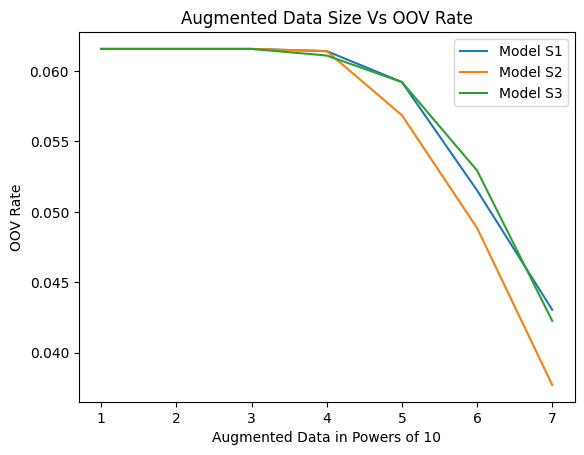

In [4]:
from matplotlib import pyplot as plt
plt.plot(list(range(1,8)),oov_s1, label='Model S1')
plt.plot(list(range(1,8)), oov_s2, label='Model S2')
plt.plot(list(range(1,8)), oov_s3, label='Model S3')

plt.title('Augmented Data Size Vs OOV Rate')
plt.xlabel('Augmented Data in Powers of 10')
plt.ylabel('OOV Rate')
plt.legend()
plt.show()

# Analysis (English and Bengali)
# 1) Data Preparation: - 
## English: - All newline characters are replaced by a space. We use regular expression to preprocess the data i.e. anything that is not in the domain [a-z0-9.!] is removed.
## Bengali: - in Bengali, we are strictly specifying to remove anything that comes in the window           [a-zA-Z0-9()🇧//:<>""-`=\|’🇩“~”_] because of the change in literature.
## Now that we have a preprocessed data for both the languages, we are randomly splitting them into 80% train set and 20% test set. They are eng_train.txt, eng_test.txt, beng_train.txt and beng_test.txt

# 2) Sub word Segmentation: - 
## Here, for the purpose of sub word segmentation, we have trained 3 models for each language which have their corresponding output files listed with the respective sub-words generated. 
## Characters Level: - S1
## English: - eng_model_s1.model is a model trained with vocab size of  62 i.e. character level segmentation. eng_s1.txt is the file of train set and eng_test_s1.txt is the file of test that is generated after character level segmentation. 
## Bengali: - Similarly, we have beng_model_s1.model trained with vocab size of 93, beng_s1.txt and beng_test_s1.txt respectively w.r.t character level segmentation.

## Sub word Units: smaller vocabulary, closer to characters: - S2
## English: - we have eng_model_s2.model trained with vocab size of 500 having eng_s2.txt and eng_test_s2.txt as the generated segmented content for train and test corpus.
## Bengali: -  similarly, we have beng_model_s2.model trained with the vocab size of 700 and its corresponding train and test corpus segmented content.

## Sub word Units: larger vocabulary, closer to words: - S3
## As before, we have eng_model_s3.model and beng_model_s3.model models trained with vocab size of 2000 and 2500. 

## As we take a look at these files, we infer that the word segmentation comparatively has a huger vocabulary size and when compared b/w the 2 languages, it is more with respect to Bengali. This could also be observed in the values given to “vocab_size” flag in both of these languages. Bengali’s value was always greater than English for all the 3 models as it is found to be morphologically rich and also contains more letters in its alphabet. 

# 3) LM Training: - 
## We used Hidden Size as 40, BPTT as 3 for all the Baseline Models for both the languages.

# Final Model Parameters: - 
## As we tried plugging in different values of hyper parameters, we arrived at better models with following values.

## English, S1: - hidden layers 160 bptt 7 and class 268. 
## S2: - hidden layers 85 bptt 3 and class 268.
## S3: -  hidden layers 60 bptt 5 and class 268.

## Bengali, S1: - hidden layers 80 bptt 5 and class 268. 
## S2: -  hidden 90, bptt 5 and class 875. 
## S3: - hidden 120, bptt 6 and class 2670.

|       | English     |          | Bengali     |          |
| ----- | ----------- | -------- | ----------- | -------- |
| Model | Baseline PP | Final PP | Baseline PP | Final PP |
| S1    | 5.27        | 4.19     | 16.3        | 13.11    |
| S2    | 34.36       | 32.74    | 91.85       | 76.96    |
| S3    | 152.00      | 148.65   | 274.27      | 256.95   |


# 4) Text Generation: 
## The artificially generated data for both languages is stored under the directories eng_s1(and s2 and s3) and beng_s1(and s2 and s3) respectively. 
## For every model S1, S2 and S3, we inspect the quality of the data and found following inferences: -
## Character segmentation can model any compositions of characters and enable better modelling of rare morphological variants. However, the improvements may not be much significant due to missing important information since the character level is more fine-grained. Hence, the generated data using model S1 is comparatively poor in quality.
## Sub word Units closer to characters and words provide more meaningful representation. For example, consider the word “looked” split into “look” and “ed”. In other words, two vectors are used to represent “looked”. Therefore, even if this word is an unknown word, still the model can translate the word accurately by treating it as a sequence of sub word units. Hence, improving the quality. In case of Bengali, as we do not know the language, we expect sub word granularity (closer to words) should work better than the other two as it is morphologically rich. 
## Therefore, for English, quality of S2 > S3 > S1 and for Bengali, S3 > S2 > S1.

# 5) OOV comparison: 
## We initially check the oov rate with respect to the original corpus and it was found to be 6.1% for English and 16.3% for Bengali. Later, we add the generated data to the original corpus by gradually increasing the vocab size in powers of 10. We see decrease in the oov rate in both languages as and when the vocab size increases. This is a known fact but the question is, which model of the three i.e. S1, S2 and S3 has lesser oov rate? 
## From our observation, S2 for English has oov rate 3.9% at 10000000 which is lesser than the other 2 models i.e. S2 < S3 < S1
## For Bengali, S3 has lesser oov rate of 12.14% compared to S2 and S1, i.e. S3 < S2 < S1.
## Hence, from the above observations, we use S2 (sub word granularity closer to character) model for English and S3(sub word granularity closer to words) for Bengali.

# Summary:  
## To summarize, this activity provides a good intuition on the importance of OOV rate in a language model and the ways in which it could be tackled. It also introduces us to the BPE algorithm and segmentation granularities, which are often used to overcome this issue. To conclude regarding the results, it was as expected that the Bengali language model is poorer compared to English but surprisingly led us in finding better results than the baseline model for Bengali. The hyper parameters that have an impact on the OOV rates are the hidden layers and bptt. An adequate amount of vocab size also matters. With these in right values, we can optimize oov rate to fetch a better model.
